**Вариант 1. Очистка данных и обучение моделей.**

Данный вариант предполагает фокусировку на обучении нескольких видов моделей обучения с учителем. В зависимости от набора данных, может предполагаться задача классификации и регрессии. Необходимо после минимальной подготовки датасета к обучению обучить несколько моделей и сравнить их эффективность.

В машинном обучении, задача классификации и задача регрессии отличаются по своей природе и цели.

__Задача классификации:__
- Цель: Классификация объектов на заранее определенные категории или классы.
- Входные данные: Объекты или примеры, для которых известны метки классов.
- Выходные данные: Дискретные метки классов или вероятности принадлежности к каждому классу.
- Примеры: Определение, является ли электронное письмо спамом или не спамом, классификация изображений на категории (кошка, собака, автомобиль), определение тональности текста (положительная, отрицательная, нейтральная).

__Задача регрессии:__
- Цель: Предсказание непрерывного числового значения, основанного на входных данных.
- Входные данные: Объекты или примеры, для которых известны числовые значения.
- Выходные данные: Предсказанное числовое значение или набор значений.
- Примеры: Предсказание цены дома на основе его характеристик (площадь, количество комнат), прогнозирование продажи товаров в будущем, оценка вероятности возникновения определенного события.

Ещё раз - в задаче классификации мы стараемся определить, к какому заранее определенному классу относится объект на основе доступных данных. В задаче регрессии мы стремимся предсказать непрерывное числовое значение, которое может быть любым из возможных значений в заданном диапазоне.


Исходя из этого на экзамене надо будет определить что за задача и решать её определённым способом.
В этом ноутбуке я покажу решения для регрессии на датасете, который у Коротеева в методичке.

## Если вам попалась задачи регрессии (зависит от датасета, нужно понять самим)
Для примера возбьмём датасет https://www.kaggle.com/datasets/nandvard/microsoft-data-science-capstone
Если перейдёте по ссылке, то там будет дополнительная информация, конкретно у этого датасета написано - цель состоит в том, чтобы спрогнозировать уровень сердечных заболеваний (на 100 000 человек),

***Note:*** при выборе целевой переменной, которую будете предсказывать будьте внимательны, читайте описание к датасету.

Переходите по ссылке и скачивайте датасет
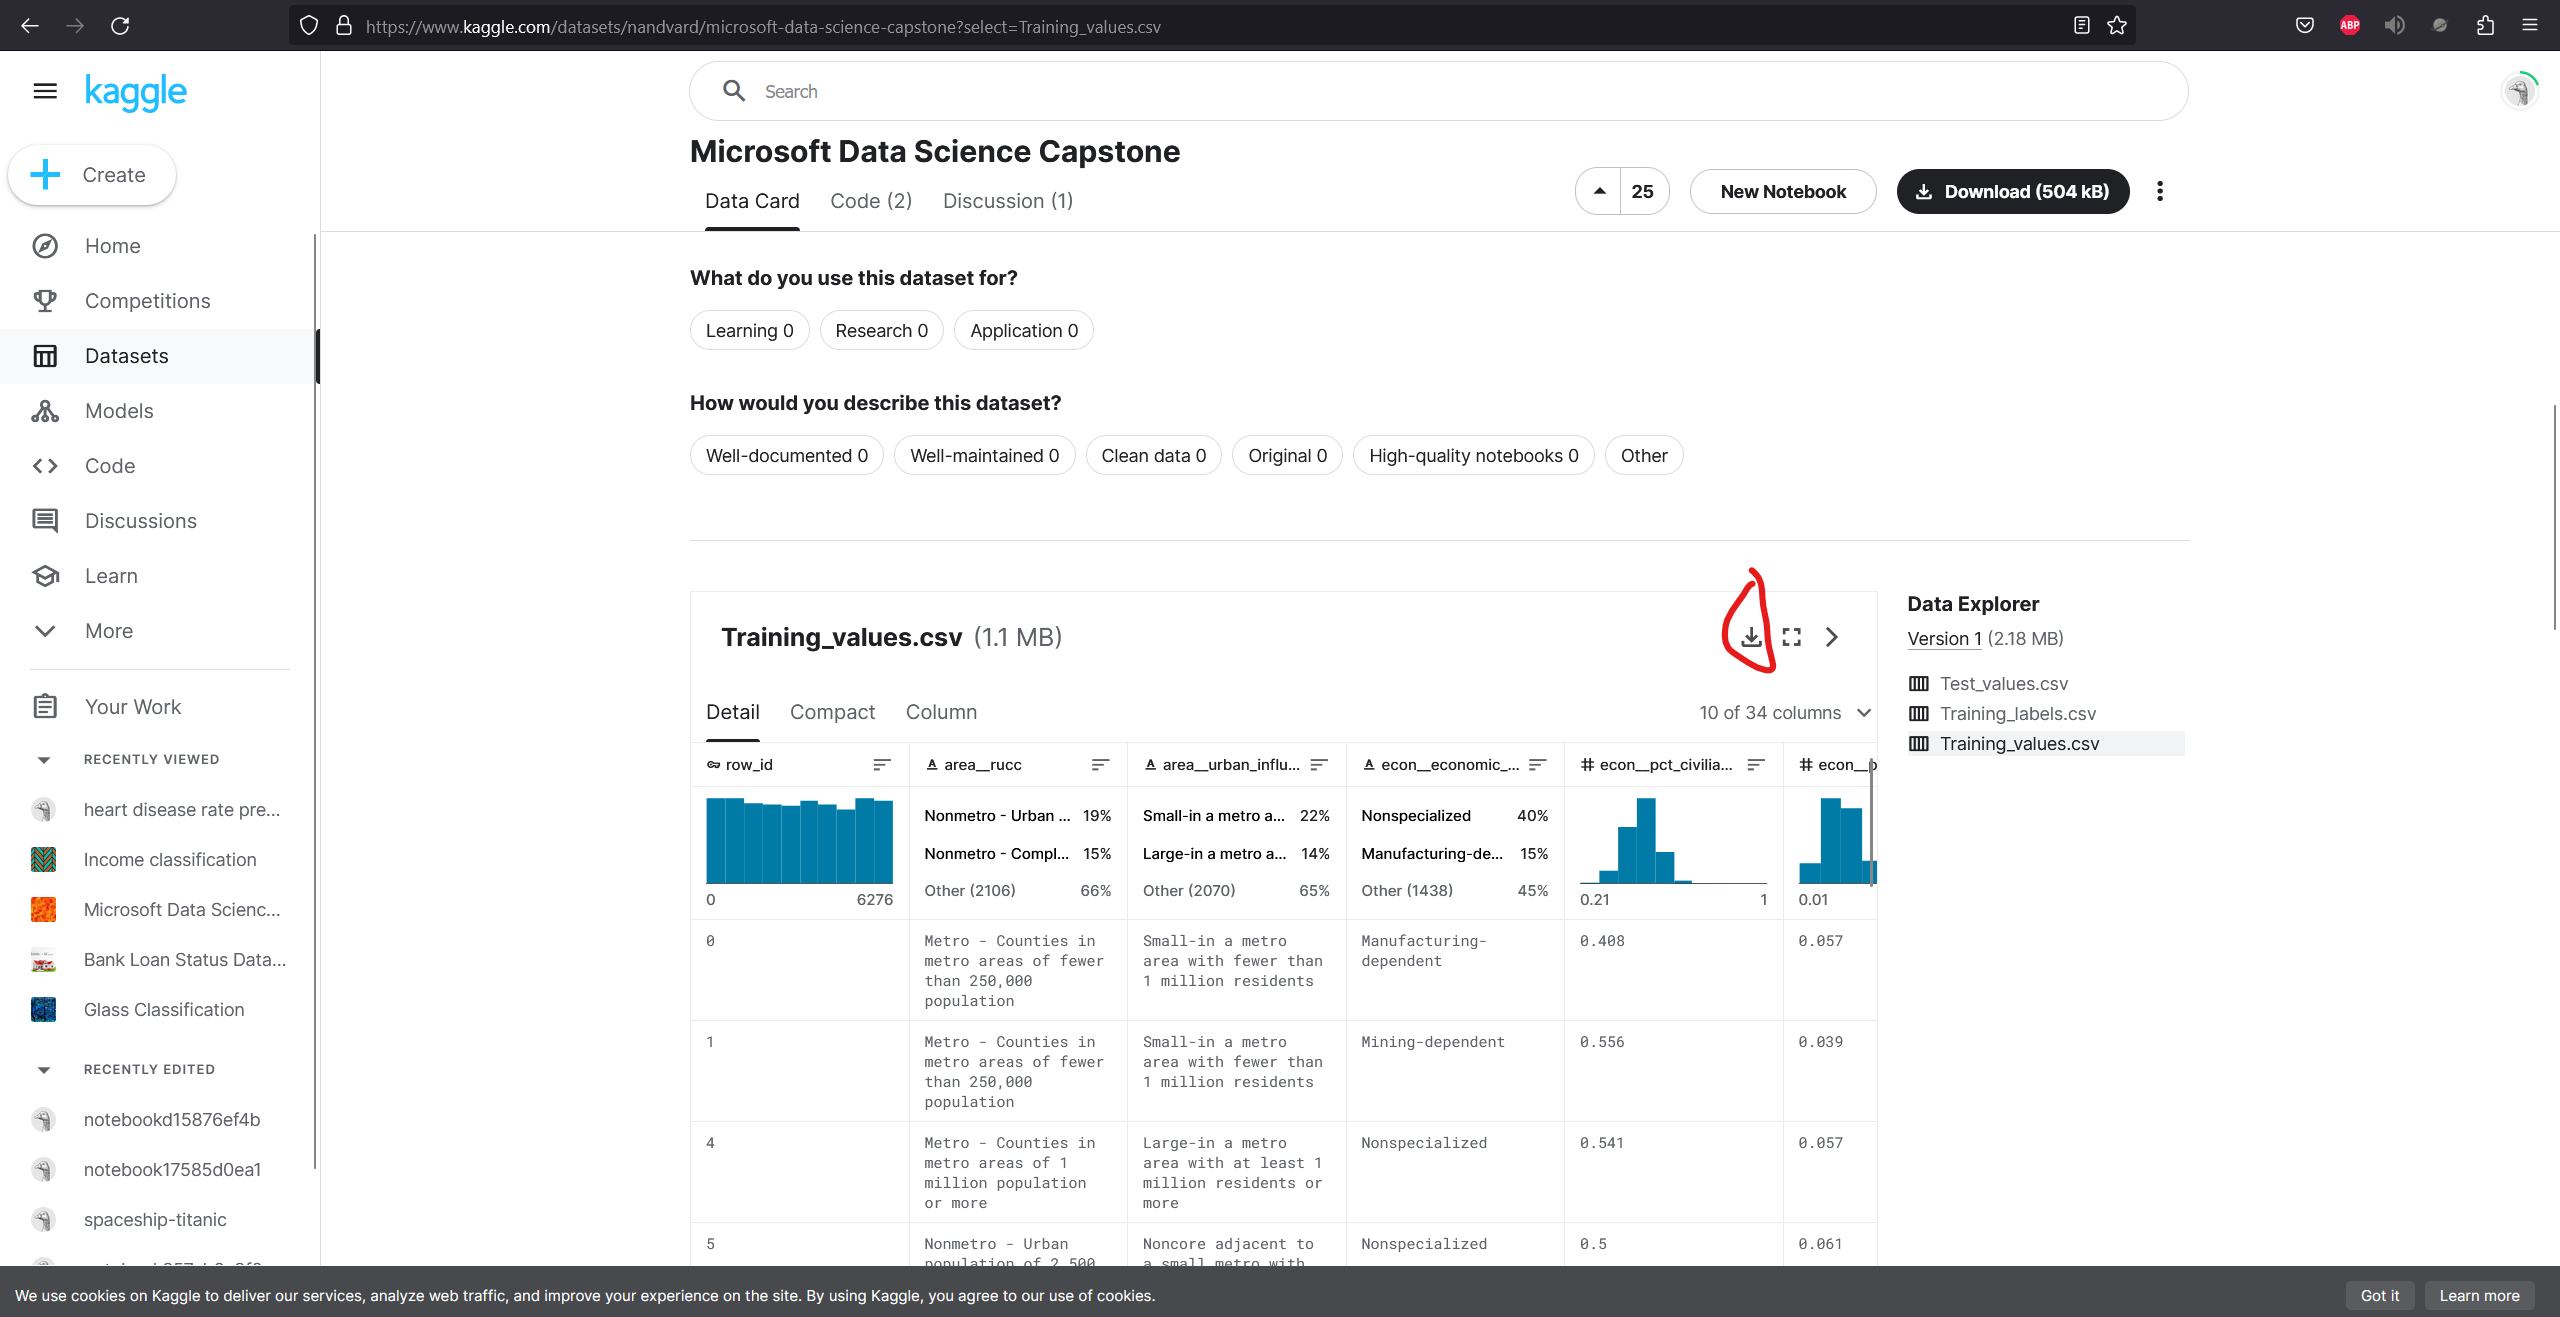

***Note:*** обратите внимание, что там три файла - Test_values.csv, Training_labels.csv, Training_values.csv. Нам надо скачать Training_labels и Training_values, причём Training_values - это наши признаки(переменные, по которым будем предсказывать), а Training_labels - то, что мы должны предсказывать. Третий файл нам не нужен, он для для соревнований. Если что, спросите чёлку, а если она не поможет, то напишите мне

ещё там есть код, который писали другие люди, его тоже можно использовать, если он вам понадобится. посмотреть ноутбуки можно вроде бы только зарегистрированным пользователям, я не помню.
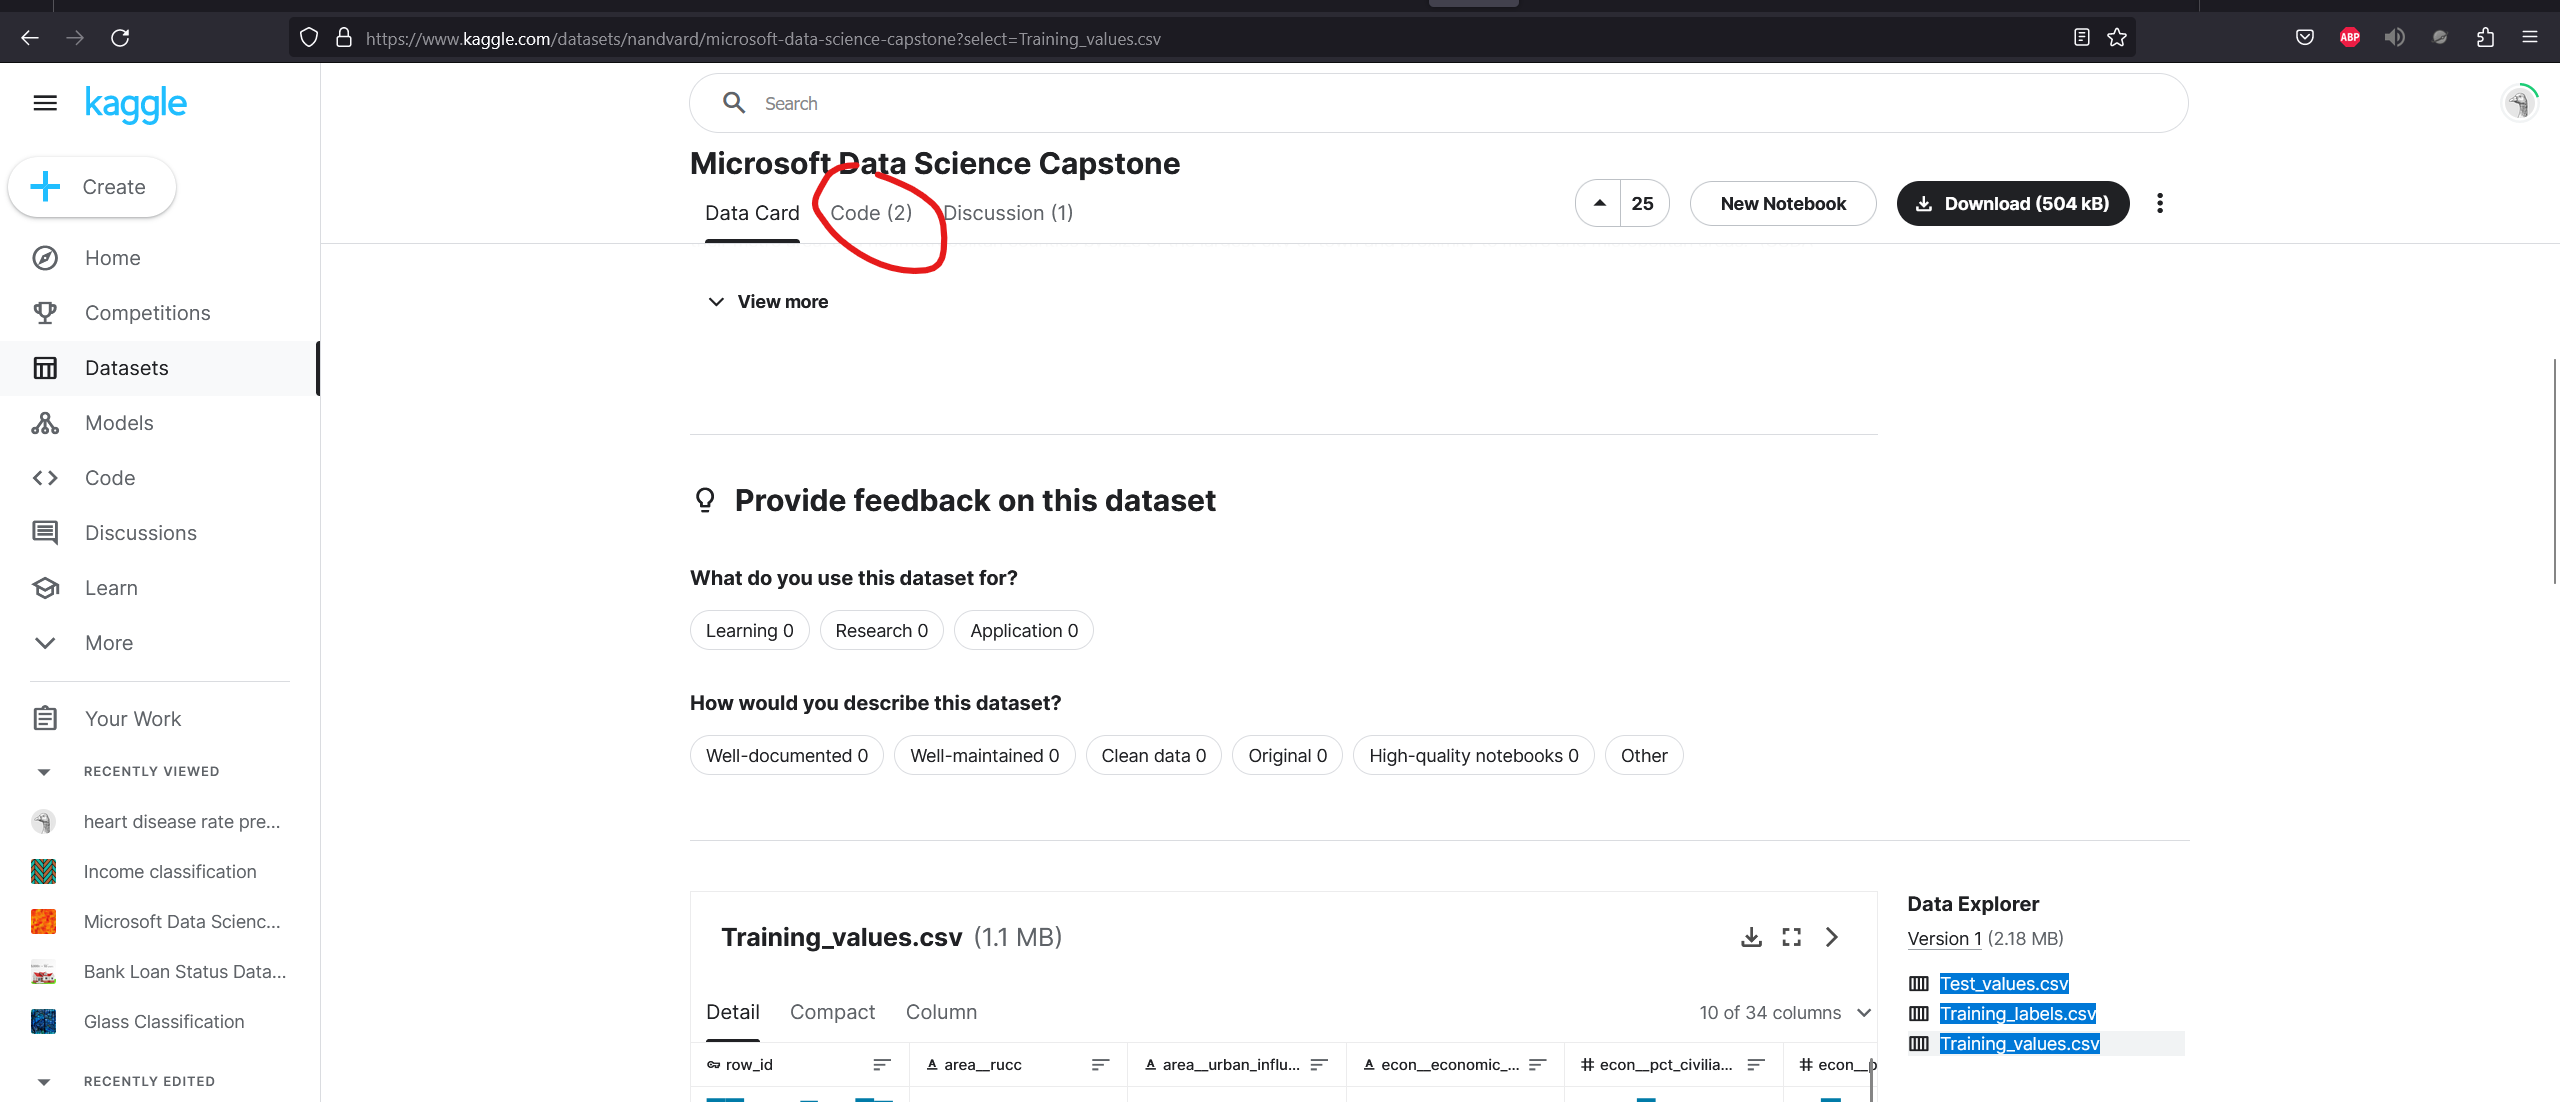

### Ниже представлено решение этой задачи.

нужно именно повторить так, как ниже, потому что чёлка доёбывается до всего.

# Вариант 1. Очистка данных и обучение моделей. Датасет https://www.kaggle.com/datasets/nandvard/microsoft-data-science-capstone?select=Training_values.csv

Данный вариант предполагает фокусировку на обучении нескольких видов моделей обучения с учителем. В зависимости от набора данных, может предполагаться задача классификации и регрессии. Необходимо после минимальной подготовки датасета к обучению обучить несколько моделей и сравнить их эффективность.


**Импортируем нужные библиотеки**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Предобработка данных

**Считываем данные**

Так как у нас признаки и целевая метрика в разных файлах, то сначала надо их объединить, потому что потом мы будем удалять и могут возникунуть ошибки

In [2]:
X = pd.read_csv('Training_values.csv', index_col='row_id')
y = pd.read_csv('Training_labels.xls', index_col='row_id')
dataset = pd.concat([X, y], axis=1, join="inner")
dataset.head()

,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,...,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr,heart_disease_mortality_per_100k
row_id,,,,,,,,,,,,,,,,,,,,,
0,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,0.235,0.176,...,0.089,NaN,0.332,13.0,2.80,15.09,1650.0,1489.0,a,312
1,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Mining-dependent,0.556,0.039,0.260,0.143,0.503,0.272,0.101,...,0.082,0.181,0.265,10.0,2.30,19.79,2010.0,2480.0,a,257
4,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.541,0.057,0.070,0.023,0.522,0.179,0.115,...,0.098,0.195,0.209,10.0,9.31,3.14,629.0,690.0,b,195
5,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to a small metro with town of...,Nonspecialized,0.500,0.061,0.203,0.059,0.525,0.200,0.164,...,0.058,NaN,0.238,13.0,NaN,NaN,1810.0,6630.0,b,218
6,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore not adjacent to a metro/micro area and...,Nonspecialized,0.471,0.050,0.225,0.103,0.511,0.237,0.171,...,0.070,0.194,0.290,9.0,NaN,29.39,3489.0,2590.0,a,355


эту картинку вставлять не надо, показываю откуда брать описание. Достаточно просто прогнать через переводчик
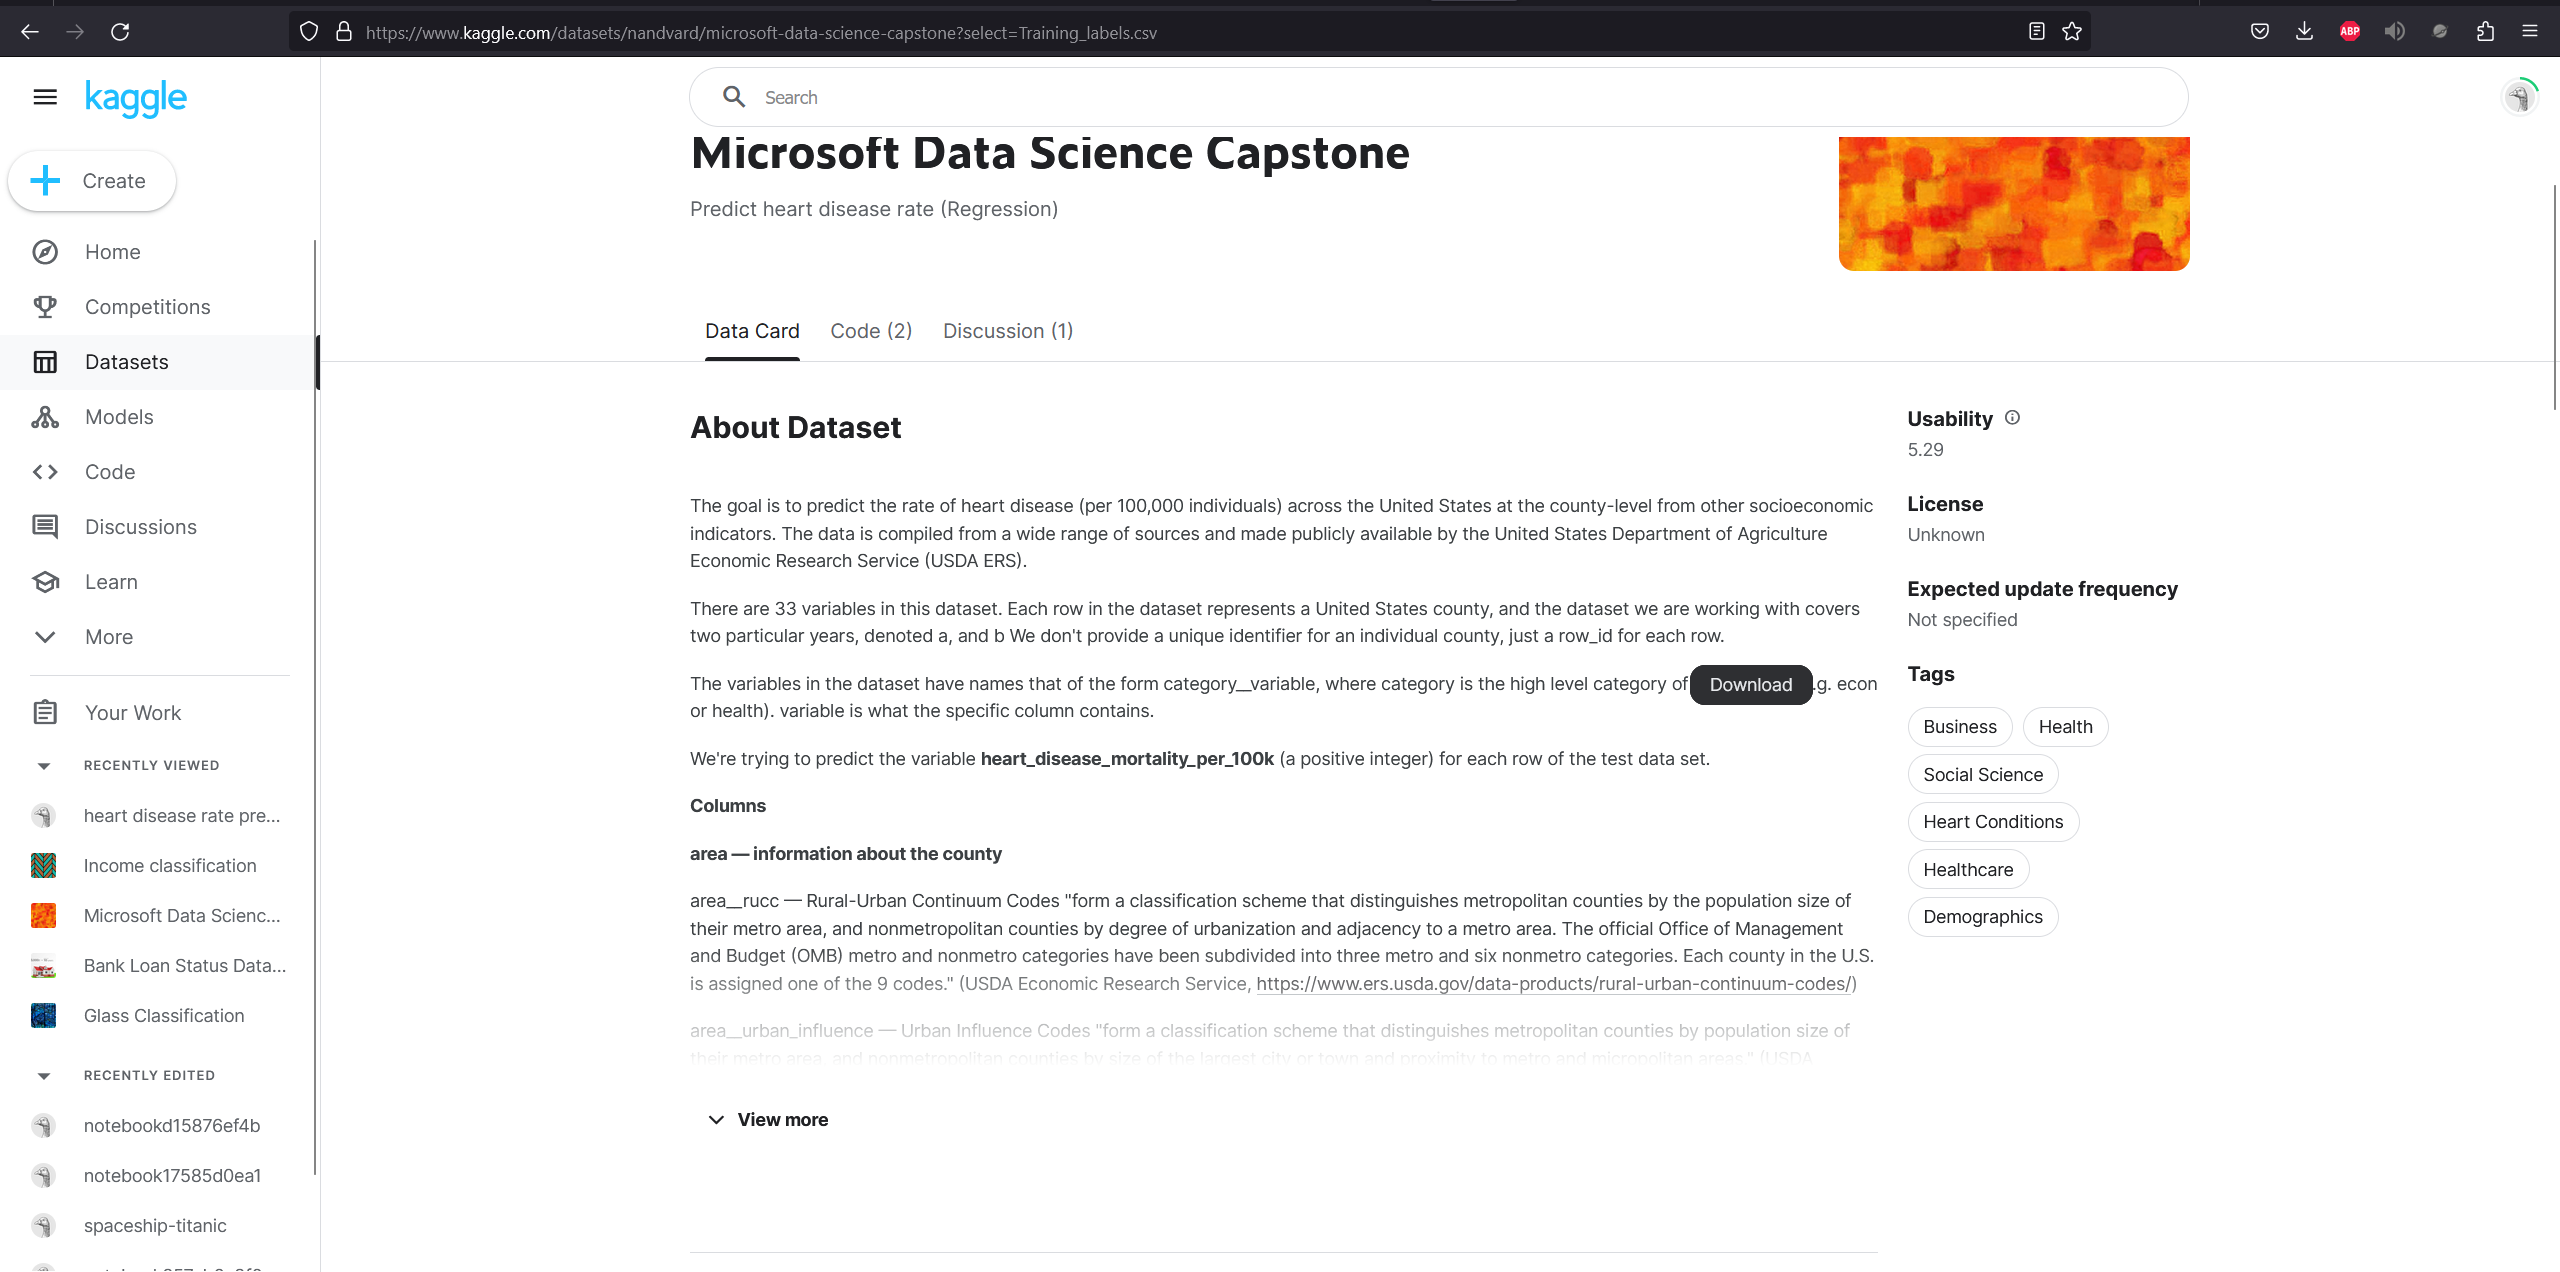

Описание датасета:

Цель состоит в том, чтобы спрогнозировать уровень сердечных заболеваний (на 100 000 человек) по всей территории Соединенных Штатов на уровне округов на основе других социально-экономических показателей. Данные собраны из широкого спектра источников и предоставлены в открытый доступ Службой экономических исследований Министерства сельского хозяйства Соединенных Штатов (ERS Министерства сельского хозяйства США).

В этом наборе данных содержится 33 переменные. Каждая строка в наборе данных представляет округ Соединенных Штатов, а набор данных, с которым мы работаем, охватывает два конкретных года, обозначаемых a и b. Мы не предоставляем уникальный идентификатор для отдельного округа, просто row_id для каждой строки.

Переменные в наборе данных имеют имена, соответствующие форме category__variable, где category - это категория высокого уровня переменной (например, экономика или здравоохранение). переменная - это то, что содержит конкретный столбец.

Мы пытаемся предсказать переменную heart_disease_mortality_per_100k (положительное целое число) для каждой строки тестового набора данных.

Столбцы

- area — информация об округе

- area_rucc — Коды континуума между сельскими и городскими районами " образуют классификационную схему, которая различает столичные округа по численности населения в их районе метро, а неметрополитенские округа по степени урбанизации и близости к району метро. Категории метро и неметрополитенов официального Управления по управлению и бюджету (OMB) были разделены на три категории метро и шесть категорий неметрополитенов. Каждому округу в США присвоен один из 9 кодов." (Служба экономических исследований Министерства сельского хозяйства США, https://www.ers.usda.gov/data-products/rural-urban-continuum-codes /)

- area__urban_influence — Коды влияния городов "формируют классификационную схему, которая различает столичные округа по численности населения в их районе метро, а неметрополитенские округа по размеру крупнейшего города и близости к метро и микрорайонам". (Служба экономических исследований Министерства сельского хозяйства США, https://www.ers.usda.gov/data-products/urban-influence-codes /)

- econ — экономические показатели

- econ__economic_typology — Коды типологии округов "классифицируют все округа США в соответствии с шестью взаимоисключающими категориями экономической зависимости и шестью пересекающимися категориями тем, имеющих отношение к политике. Типы экономической зависимости включают сельское хозяйство, добычу полезных ископаемых, обрабатывающую промышленность, федеральное правительство/правительство штата, рекреацию и неспециализированные округа. К типам, имеющим отношение к политике, относятся низкий уровень образования, низкая занятость, сохраняющаяся бедность, сохраняющаяся детская бедность, убыль населения и место выхода на пенсию." (Служба экономических исследований Министерства сельского хозяйства США, https://www.ers.usda.gov/data-products/county-typology-codes.aspx )

- экономика__рст_гражданский_труд — Гражданская рабочая сила, среднегодовой показатель, в процентах от численности населения (Бюро статистики труда, http://www.bls.gov/lau /)

- econ__pct_безработица — Безработица в среднем за год в процентах от численности населения (Бюро статистики труда, http://www.bls.gov/lau /)

- econ__pct_незастрахованные_взрослые — процент взрослых, не имеющих медицинской страховки (Бюро статистики труда, http://www.bls.gov/lau /)
- econ__pct_незастрахованные_дети — процент детей, не имеющих медицинской страховки (Бюро статистики труда, http://www.bls.gov/lau /)

- здоровье — показатели состояния здоровья

- здоровье__pct_ожирение у взрослых_ — Процент взрослых, которые соответствуют клиническому определению ожирения (Национальный центр профилактики хронических заболеваний и укрепления здоровья)

- здоровье__pct_курение среди взрослых — процент курящих взрослых (система наблюдения за поведенческими факторами риска)

- здоровье__pct_диабет — Процент населения, страдающего диабетом (Национальный центр профилактики хронических заболеваний и укрепления здоровья, Отдел перевода диабета)

- здоровье__pct_низкий_вес при рождении — процент младенцев, родившихся с низким весом при рождении (Национальный центр статистики здравоохранения)

- здоровье__pct_чрезмерное употребление алкоголя — процент взрослого населения, которое злоупотребляет алкоголем (система наблюдения за поведенческими факторами риска, )

- здоровье__рст_физическая_неактивность — процент физически неактивного взрослого населения (Национальный центр профилактики хронических заболеваний и укрепления здоровья)

- здоровье__загрязнение воздуха_твердыми частицами_вещества — мелкодисперсные твердые частицы в мкг/м3 (CDC WONDER, https://wonder.cdc.gov/wonder/help/pm.html )

- здоровье__убийств_на_100 тыс. — Смертей в результате убийств на 100 000 населения (Национальный центр статистики здравоохранения)

- здоровье__дорожно—транспортные происшествия_смертельные случаи_на_100 тыс. - Смертельные случаи в результате дорожно-транспортных происшествий на 100 000 населения (Национальный центр статистики здравоохранения)

- health__pop_per_dentist — Численность населения на одного стоматолога (файл ресурсов области HRSA)

- здравоохранение__pop_на одного врача первичной медико—санитарной помощи - Численность населения на одного врача первичной медико-санитарной помощи (файл ресурсов области HRSA)

- демо — демографическая информация

- demo__pct_female — Процент населения, состоящего из женщин (по оценкам переписи населения США)

- демо__рст_моложе_18_лет_от_возраста — процент населения в возрасте до 18 лет (оценки переписи населения США)

- демо__процент_в возрасте_65_лет_и_старше — процент населения в возрасте 65 лет и старше (оценки переписи населения США)

- демо__pct_испаноязычный — процент населения, которое идентифицирует себя как испаноязычное (оценки населения по переписи населения США)

- демо__pct_не_ испаноязычный_афроамериканец_ — Процент населения, идентифицирующего себя как афроамериканец (оценки населения по переписи населения США)

- демо__pct_неиспаноязычные_белые — процент населения, которое идентифицирует себя как испаноязычное и белое (оценки населения по переписи населения США)

- демо__процент_американских_индейцев_или_уроженцев Аляски_ — процент населения, которое идентифицирует себя как коренное американское (оценки населения по переписи населения США)

- демо__pct_азиаты — Процент населения, идентифицирующего себя как азиаты (оценки численности населения по переписи населения США)

- демо__pct_взрослые_менее__диплома о среднем образовании — процент взрослого населения, не имеющего диплома о среднем образовании (Перепись населения США, опрос американского сообщества)

- демо__pct_взрослые_с дипломом _средней_школы_ — процент взрослого населения, имеющего диплом о высшем образовании как наивысший достигнутый уровень образования (Перепись населения США, опрос американского сообщества)

- демонстрационный__процент_взрослых_с_некоторым_колледжем — процент взрослого населения, у которого какой-либо колледж является наивысшим достигнутым уровнем образования (Перепись населения США, опрос американского сообщества)

- демо__pct_взрослые_бакалавры_или_выше — процент взрослого населения, имеющего степень бакалавра или выше в качестве наивысшего достигнутого уровня образования (Перепись населения США, опрос американского сообщества)

- демо__коэффициент рождаемости_на_1 тыс. — Рождений на 1000 населения (оценки численности населения по переписи населения США)

- демо__коэффициент смертности_на_1 тыс. — Смертей на 1000 населения (оценки численности населения по переписи населения США)

**Размер датасета**

In [3]:
dataset.shape

(3198, 34)

**Основная информация о датасете**

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3198 entries, 0 to 6276
Data columns (total 34 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   area__rucc                                        3198 non-null   object 
 1   area__urban_influence                             3198 non-null   object 
 2   econ__economic_typology                           3198 non-null   object 
 3   econ__pct_civilian_labor                          3198 non-null   float64
 4   econ__pct_unemployment                            3198 non-null   float64
 5   econ__pct_uninsured_adults                        3196 non-null   float64
 6   econ__pct_uninsured_children                      3196 non-null   float64
 7   demo__pct_female                                  3196 non-null   float64
 8   demo__pct_below_18_years_of_age                   3196 non-null   float64
 9   demo__pct_aged_65_y

**Описательная статистика числовых признаков**

In [5]:
dataset.describe() 

,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,...,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,heart_disease_mortality_per_100k
count,3198.000000,3198.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,...,3196.000000,3016.000000,2220.000000,3196.000000,3170.000000,1231.000000,2781.000000,2954.000000,2968.000000,3198.000000
mean,0.467191,0.059696,0.217463,0.086067,0.498811,0.227715,0.170043,0.090207,0.091046,0.769989,...,0.109260,0.083896,0.164841,0.277161,11.625868,5.947498,21.132618,3431.433649,2551.339286,279.369293
std,0.074400,0.022947,0.067362,0.039849,0.024399,0.034282,0.043694,0.142763,0.147165,0.207850,...,0.023216,0.022251,0.050474,0.053003,1.557996,5.031822,10.485923,2569.450603,2100.459467,58.953338
min,0.207000,0.010000,0.046000,0.012000,0.278000,0.092000,0.045000,0.000000,0.000000,0.053000,...,0.032000,0.033000,0.038000,0.090000,7.000000,-0.400000,3.140000,339.000000,189.000000,109.000000
25%,0.420000,0.044000,0.166000,0.057000,0.493000,0.206000,0.141000,0.019000,0.006000,0.649000,...,0.094000,0.069000,0.130000,0.242750,10.000000,2.620000,13.490000,1812.250000,1420.000000,237.000000
50%,0.468000,0.057000,0.216000,0.077000,0.503000,0.226000,0.167000,0.035000,0.022000,0.853000,...,0.109000,0.081000,0.164000,0.280000,12.000000,4.700000,19.630000,2690.000000,1999.000000,275.000000
75%,0.514000,0.072000,0.261000,0.106000,0.512000,0.246000,0.195000,0.087000,0.096000,0.936250,...,0.124000,0.095000,0.197000,0.313000,13.000000,7.890000,26.490000,4089.750000,2859.000000,317.000000
max,1.000000,0.248000,0.496000,0.281000,0.573000,0.417000,0.346000,0.932000,0.858000,0.990000,...,0.203000,0.238000,0.367000,0.442000,15.000000,50.490000,110.450000,28130.000000,23399.000000,512.000000


**Статистика категориальных признаков**

In [6]:
dataset.describe(include=['O']) 

,area__rucc,area__urban_influence,econ__economic_typology,yr
count,3198,3198,3198,3198
unique,9,12,6,2
top,"Nonmetro - Urban population of 2,500 to 19,999...",Small-in a metro area with fewer than 1 millio...,Nonspecialized,a
freq,608,692,1266,1599


Если уникальных значений будет очень-очень много, например, какой-нибудь id и подобное, то можно смело потом удалить, но нужно об этом написать обязательно, вообще чем больше выводов и объяснений, тем лучше, так как училка-чёлка доёбывает за это. Команда для удаления колонки `dataset.drop(columns=['колонка1', 'колнка2' ..], inplace=True)`
Здесь я id уже как бы удалил - выполняя команду `dataset = pd.read_csv('Training_values.csv', index_col='row_id')`, я указал index_col='row_id', теперь он используется в качестве индекса. Внимательно смотрите что делаете, придётся немного разобраться

**Матрица корреляций**

In [7]:
dataset.corr()

,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,...,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,heart_disease_mortality_per_100k
econ__pct_civilian_labor,1.000000,-0.619050,-0.409084,-0.027494,0.110016,-0.014214,0.005105,0.006413,-0.344771,0.272709,...,-0.501138,-0.438661,0.387857,-0.346026,-0.117639,-0.391567,-0.346759,-0.285938,-0.218591,-0.476644
econ__pct_unemployment,-0.619050,1.000000,0.272174,-0.104250,0.071061,0.004807,-0.049590,-0.023614,0.382720,-0.318868,...,0.421372,0.378766,-0.214149,0.230216,0.150009,0.418517,0.229797,0.178324,0.136225,0.371620
econ__pct_uninsured_adults,-0.409084,0.272174,1.000000,0.717686,-0.075923,0.280156,-0.075758,0.477905,0.206069,-0.553043,...,0.294417,0.327780,-0.340959,0.285383,-0.219350,0.410288,0.455132,0.237915,0.165261,0.334217
econ__pct_uninsured_children,-0.027494,-0.104250,0.717686,1.000000,-0.210481,0.183530,0.083595,0.441586,-0.102605,-0.296403,...,-0.055636,0.023666,-0.045826,0.009911,-0.345746,0.109011,0.406176,0.152708,0.103520,-0.034482
demo__pct_female,0.110016,0.071061,-0.075923,-0.210481,1.000000,0.198426,0.106818,-0.161775,0.098055,0.066155,...,0.189265,0.074387,-0.215347,0.068177,0.109214,0.150494,-0.078898,-0.131156,-0.131682,0.087040
demo__pct_below_18_years_of_age,-0.014214,0.004807,0.280156,0.183530,0.198426,1.000000,-0.566433,0.320619,0.021930,-0.372009,...,-0.039540,-0.034874,-0.125961,0.061171,-0.113426,0.117317,0.136475,0.010419,0.063192,0.121956
demo__pct_aged_65_years_and_older,0.005105,-0.049590,-0.075758,0.083595,0.106818,-0.566433,1.000000,-0.245170,-0.225004,0.443333,...,0.213014,-0.076327,0.069281,0.164289,-0.074186,-0.075816,0.214857,0.049268,-0.004279,-0.056203
demo__pct_hispanic,0.006413,-0.023614,0.477905,0.441586,-0.161775,0.320619,-0.245170,1.000000,-0.105977,-0.606503,...,-0.252581,-0.005086,-0.031318,-0.215272,-0.392282,-0.042616,-0.053457,0.033520,0.000065,-0.112437
demo__pct_non_hispanic_african_american,-0.344771,0.382720,0.206069,-0.102605,0.098055,0.021930,-0.225004,-0.105977,1.000000,-0.593988,...,0.486529,0.681410,-0.284243,0.257043,0.166423,0.694183,0.106834,0.148207,0.108058,0.375385
demo__pct_non_hispanic_white,0.272709,-0.318868,-0.553043,-0.296403,0.066155,-0.372009,0.443333,-0.606503,-0.593988,1.000000,...,-0.157388,-0.418430,0.164171,-0.001750,0.227679,-0.578210,-0.114775,-0.057082,-0.039831,-0.157544


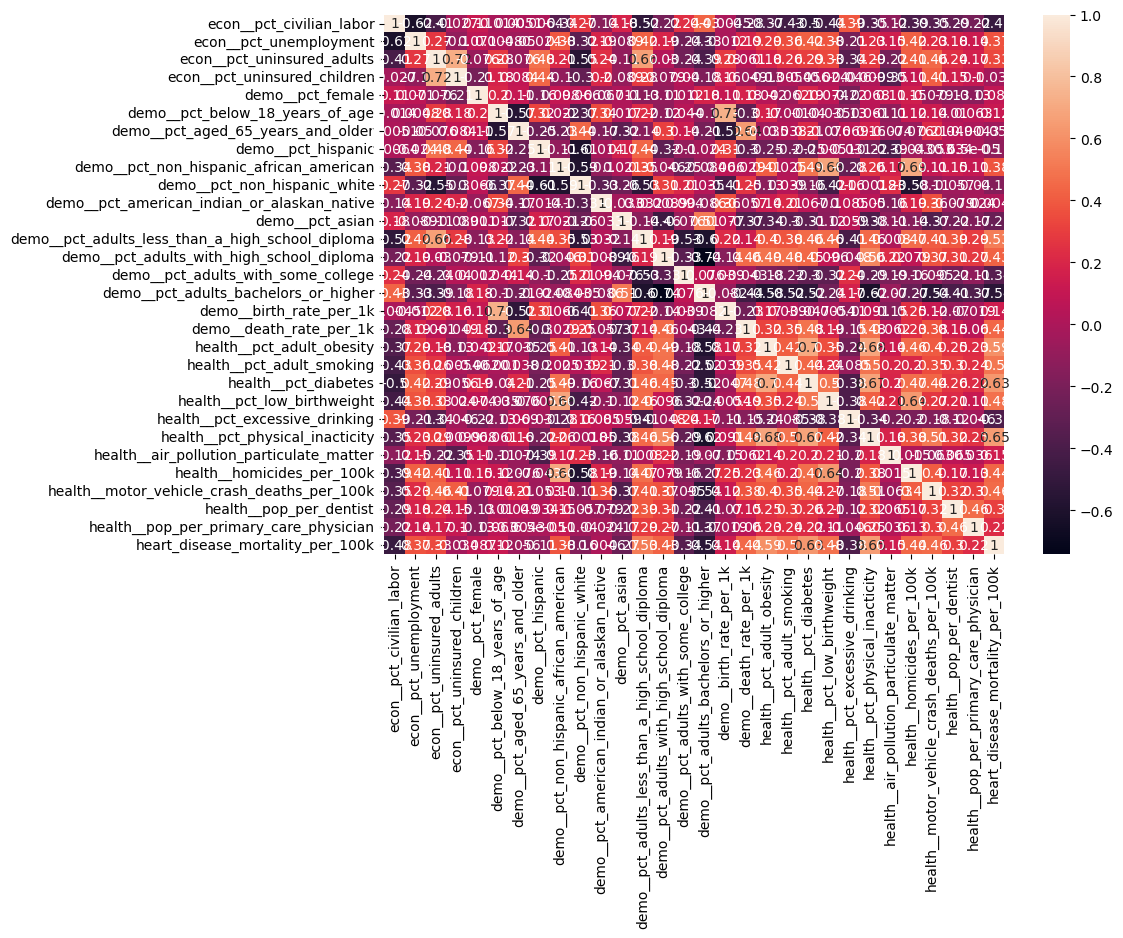

In [8]:
plt.figure(figsize = (10,7))
sns.heatmap(dataset.corr(), annot=True); # здесь она плохо выглядит, лучше не включать её

**Проверка пропусков**

In [9]:
dataset.isna().sum()

area__rucc                                             0
area__urban_influence                                  0
econ__economic_typology                                0
econ__pct_civilian_labor                               0
econ__pct_unemployment                                 0
econ__pct_uninsured_adults                             2
econ__pct_uninsured_children                           2
demo__pct_female                                       2
demo__pct_below_18_years_of_age                        2
demo__pct_aged_65_years_and_older                      2
demo__pct_hispanic                                     2
demo__pct_non_hispanic_african_american                2
demo__pct_non_hispanic_white                           2
demo__pct_american_indian_or_alaskan_native            2
demo__pct_asian                                        2
demo__pct_adults_less_than_a_high_school_diploma       0
demo__pct_adults_with_high_school_diploma              0
demo__pct_adults_with_some_coll

Вывод - пропуски есть. Их надо удалить.

В случае если пропуски будут:

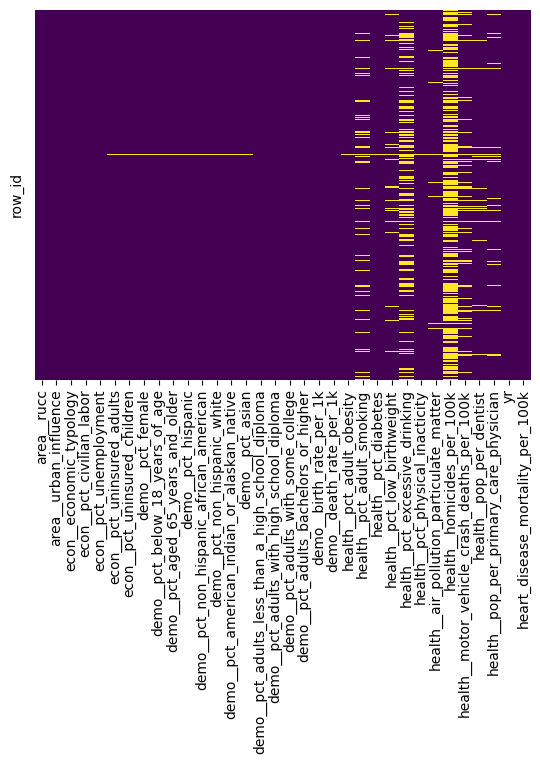

In [10]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis'); # визуализация 

На данной диаграмме и в ячейке видно, что в столбцах `health__pct_excessive_drinking` и `health__motor_vehicle_crash_deaths_per_100k` много пропусков, по 1/3 и 2/3 от всех данных, целесообразно удалить эти значения. Также можно сделать вывод, что можно удалить другие пропущенные значения, чтобы очистить данные от пропусков. Здесь это будет хорошим решением. Смотрите сами - ещё можно заполнять пропущенные значения в столбцах нулями - командой `dataset.fillna(0, inplace=True)`, или в каждом столбце пропущенном заполнить средним значением  `dataset['колонка'].fillna(dataset['колонка'].mean(), inplace=True)`, но лучше не заморачиваться и просто удалять пропуски. Главное, чтобы удалилось не очень много, до 33%, больше точно хуже.

In [11]:
dataset.drop(columns=['health__homicides_per_100k', 'health__pct_excessive_drinking'], inplace=True)
dataset.dropna(inplace=True)
dataset.shape

(2405, 32)

- Если в одном столбце очень много пропусков - ну примерно процентов 40+, то столбик можно удалить делается командой `dataset.drop(columns=['колонка1', 'колонка2' ..], inplace=True)`
- Если пропусков в колонках в целом немного пропусков, можно сделать `dataset.dropna(inplace=True)`

Перед удалением подумайте

**Подсчёт повторяющих строк в датасете**

In [12]:
len(dataset)-len(dataset.drop_duplicates())

0

Вывод - повторяющихся нет, но если надо удалить повторяющиеся значения, то надо выполнить `dataset.drop_duplicates(inplace=True)`

После этого можно сделать какую-нибудь визуализацию, я скину ноутбуки, там есть достаточно примеров, как визуализировать данные. Если успеете - возьмёте оттуда

**Переведение категориальных значений в числовые**

In [13]:
dataset.describe(include=['O']) # какие ячейки у нас нечисловые

,area__rucc,area__urban_influence,econ__economic_typology,yr
count,2405,2405,2405,2405
unique,9,12,6,2
top,"Nonmetro - Urban population of 2,500 to 19,999...",Small-in a metro area with fewer than 1 millio...,Nonspecialized,b
freq,511,616,1131,1204


Везде уникальных значений немного, просто закодируем. Если бы было слишком много, нужно её дропнуть - `dataset.drop(columns=['колонка1', 'колонка2' ..], inplace=True)`

In [14]:
list_of_str_columns = dataset.describe(include=['O']).columns.tolist()
list_of_str_columns

['area__rucc', 'area__urban_influence', 'econ__economic_typology', 'yr']

**кодируем колонки**

In [15]:
# Проходимся по всем категориальным колонкам и добавляем в список уже закодированные
list_of_encoded_columns = []
for col in list_of_str_columns:
    list_of_encoded_columns.append(pd.get_dummies(dataset[col], drop_first=True))

**присоединяем закодированные колонки**

In [16]:
# *list_of_encoded_columns - распаковываем значения из списка
dataset = pd.concat([dataset, *list_of_encoded_columns], axis=1)
dataset.head()

,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,...,"Noncore adjacent to micro area and does not contain a town of at least 2,500 residents","Noncore not adjacent to a metro/micro area and contains a town of 2,500 or more residents","Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents",Small-in a metro area with fewer than 1 million residents,Federal/State government-dependent,Manufacturing-dependent,Mining-dependent,Nonspecialized,Recreation,b
row_id,,,,,,,,,,,,,,,,,,,,,
0,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,0.235,0.176,...,0,0,0,1,0,1,0,0,0,0
1,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Mining-dependent,0.556,0.039,0.260,0.143,0.503,0.272,0.101,...,0,0,0,1,0,0,1,0,0,0
4,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.541,0.057,0.070,0.023,0.522,0.179,0.115,...,0,0,0,0,0,0,0,1,0,1
6,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore not adjacent to a metro/micro area and...,Nonspecialized,0.471,0.050,0.225,0.103,0.511,0.237,0.171,...,0,1,0,0,0,0,0,1,0,0
8,"Nonmetro - Urban population of 20,000 or more,...",Micropolitan adjacent to a small metro area,Federal/State government-dependent,0.501,0.048,0.212,0.055,0.516,0.207,0.121,...,0,0,0,0,1,0,0,0,0,0


**удаляем первоначальные колонки**

In [17]:
dataset.drop(list_of_str_columns, axis=1, inplace=True)
dataset.head()

,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,...,"Noncore adjacent to micro area and does not contain a town of at least 2,500 residents","Noncore not adjacent to a metro/micro area and contains a town of 2,500 or more residents","Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents",Small-in a metro area with fewer than 1 million residents,Federal/State government-dependent,Manufacturing-dependent,Mining-dependent,Nonspecialized,Recreation,b
row_id,,,,,,,,,,,,,,,,,,,,,
0,0.408,0.057,0.254,0.066,0.516,0.235,0.176,0.109,0.039,0.829,...,0,0,0,1,0,1,0,0,0,0
1,0.556,0.039,0.260,0.143,0.503,0.272,0.101,0.410,0.070,0.493,...,0,0,0,1,0,0,1,0,0,0
4,0.541,0.057,0.070,0.023,0.522,0.179,0.115,0.202,0.198,0.479,...,0,0,0,0,0,0,0,1,0,1
6,0.471,0.050,0.225,0.103,0.511,0.237,0.171,0.025,0.008,0.953,...,0,1,0,0,0,0,0,1,0,0
8,0.501,0.048,0.212,0.055,0.516,0.207,0.121,0.022,0.046,0.903,...,0,0,0,0,1,0,0,0,0,0


**убеждаемся, что нет нечисловых колонок**

In [18]:
dataset.info() # тут только float и uint, значит всё хорошо

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2405 entries, 0 to 6275
Data columns (total 53 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   econ__pct_civilian_labor                                                                            2405 non-null   float64
 1   econ__pct_unemployment                                                                              2405 non-null   float64
 2   econ__pct_uninsured_adults                                                                          2405 non-null   float64
 3   econ__pct_uninsured_children                                                                        2405 non-null   float64
 4   demo__pct_female                                                                                    2405 non-null 

Теперь надо посмотреть на распределение нашей целевой метки

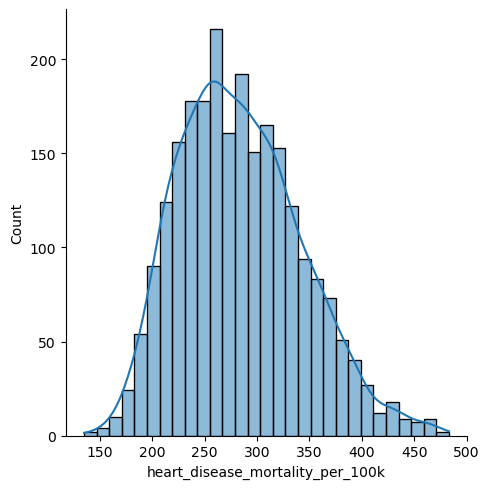

In [19]:
sns.displot(dataset['heart_disease_mortality_per_100k'], kde=True);

# Обучение модели

**Разделим датасет на признаки и целевую метрику**

In [20]:
X = dataset.drop(columns=['heart_disease_mortality_per_100k'])
y = dataset['heart_disease_mortality_per_100k']

**Отшкалируем наши признаки**

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

**Разделим датасет на обучающую и тестирующую выборки**

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Обучение моделей**

In [23]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error

Линейная регрессия

In [24]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

Оценка линейной регрессии (за основу берём r^2 score и среднюю относительную ошибка(MAE) ошибки)

In [25]:
print("R^2 : ", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE : ", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAPE : ", mean_absolute_percentage_error(y_test, y_pred))

R^2 :  0.7279277672228055
MAE : 24.114353233647908
MSE :  963.529122221013
RMSE: 31.04076549025512
MAPE :  0.08609174385526265


Как интерпретировать (понадобится для вывода):
- R2 (коэфициент детерминации) исчисляется от 1 единицы до минус бесконечности - чем ближе к единице, тем лучше
- MAE - средняя относительная ошибка - по распределению нашей целевой метрики (от 150 до 500 на графике), мы ошибаемся в среднем на 24 пункта, это нехорошо и неплохо
- MSE - средняя квадратичная ошибка - по распределению нашей целевой метрики (от 150 до 500 на графике), мы ошибаемся в среднем на 964 пункта в квадратае, в данном случае это плохо интерпретируется, поэтому лучше не брать её в этом примере
- RMSE - то же самое, что и MSE, только извлекли корень, похожа на MAE. Мы ошибаемся в среднем на 31 пункт, что не так уж и плохо учитывая масштаб нашей метрики, но и не хорошо
- MAPE - средняя относительная процентная ошибка - на сколько процентов мы ошибаемся. 8 процентов не так уж и плохо

Оценим модель с помощью кросс-валидации

In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2')
print(f"r2 - {scores.mean():0.3f} со стандартным отклонением {scores.std():0.3f}")

r2 - 0.719 со стандартным отклонением 0.023


Метод опорных векторов

In [27]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train) # может долго обучаться, это нормально
y_pred = svr.predict(X_test) 

Оценка метода опорных векторов

In [28]:
print("R^2 : ", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE : ", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAPE : ", mean_absolute_percentage_error(y_test, y_pred))

R^2 :  0.48139827776451327
MAE : 33.12523295929805
MSE :  1836.59999812281
RMSE: 42.85557137785949
MAPE :  0.11787685435940788


Оценим метод опорных векторов с помощью кросс-валидации

In [29]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(SVR(kernel='rbf'), X, y, cv=5, scoring='r2') # может долго считать, это нормально
print(f"r2 - {scores.mean():0.3f} со стандартным отклонением {scores.std():0.3f}")

r2 - 0.498 со стандартным отклонением 0.015


Дерево решений

In [30]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

Оценка дерева решений

In [31]:
print("R^2 : ", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE : ", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAPE : ", mean_absolute_percentage_error(y_test, y_pred))

R^2 :  0.5157677772386591
MAE : 29.14819944598338
MSE :  1714.8822714681442
RMSE: 41.4111370463085
MAPE :  0.10412572209443301


Оценим дерево решений с помощью кросс-валидации

In [32]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(DecisionTreeRegressor(), X, y, cv=5, scoring='r2')
print(f"r2 - {scores.mean():0.3f} со стандартным отклонением {scores.std():0.3f}")

r2 - 0.504 со стандартным отклонением 0.062


Случайный лес

In [33]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

Оценим случайный лес

In [34]:
print("R^2 : ", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE : ", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAPE : ", mean_absolute_percentage_error(y_test, y_pred))

R^2 :  0.774597302871069
MAE : 22.016495844875347
MSE :  798.2514815789475
RMSE: 28.253344608717523
MAPE :  0.0793027783212737


Оценим случайный лес с помощью кросс-валидации

In [35]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestRegressor(), X, y, cv=5, scoring='r2')
print(f"r2 - {scores.mean():0.3f} со стандартным отклонением {scores.std():0.3f}")

r2 - 0.771 со стандартным отклонением 0.013


Здесь надо будет написать вывод - напишите предложений 5, этого хватит. Надо проанализировать выбранные метрики, указать какие метрики у каких моделей лучше, какие хуже, проанализирировать их.